<a href="https://colab.research.google.com/github/janewen134/tensorflow_self_improvement/blob/master/class4/augmented_imgs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 显示原始图像和增强后的图像
import tensorflow as tf
from matplotlib import pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)

11493376/11490434 [==============================] - 0s 0us/step


In [8]:
image_gen_train = ImageDataGenerator(
    rescale = 1. / 255,
    rotation_range = 45,
    width_shift_range = .15,
    height_shift_range = .15,
    horizontal_flip=False,
    zoom_range=0.5
)

In [7]:
image_gen_train.fit(x_train)
print("xtrain", x_train.shape)
x_train_subset1 = np.squeeze(x_train[:12])
print("xtrain_subset1", x_train_subset1.shape)
print("xtrain",x_train.shape)
x_train_subset2 = x_train[:12]  # 一次显示12张图片
print("xtrain_subset2",x_train_subset2.shape)
'''
np.squeeze() function is used when
 we want to remove single-dimensional entries from the shape of an array.
Input array :  [[[2 2 2]
  [2 2 2]]]
Shape of input array :  (1, 2, 3)
output squeezed array :  [[2 2 2]
 [2 2 2]]
Shape of output array :  (2, 3)
'''

xtrain (60000, 28, 28, 1)
xtrain_subset1 (12, 28, 28)
xtrain (60000, 28, 28, 1)
xtrain_subset2 (12, 28, 28, 1)


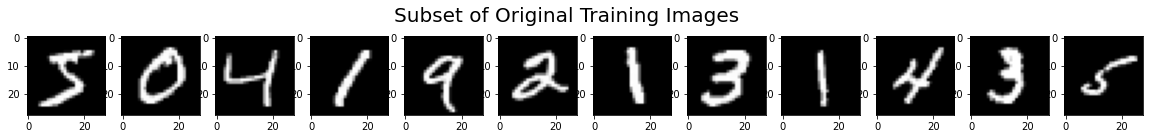

In [5]:
fig = plt.figure(figsize=(20, 2))
plt.set_cmap('gray')
# 显示原始图片
for i in range(0, len(x_train_subset1)):
    ax = fig.add_subplot(1, 12, i + 1)
    ax.imshow(x_train_subset1[i])
fig.suptitle('Subset of Original Training Images', fontsize = 20)
plt.show()

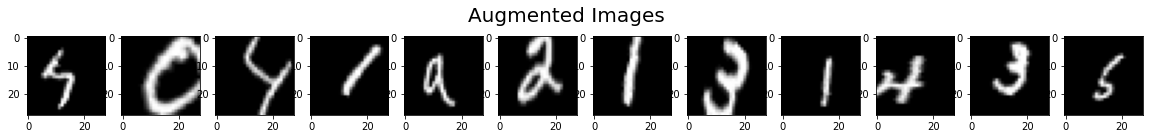

In [6]:
# 显示增强后的图片
fig = plt.figure(figsize=(20, 2))
for x_batch in image_gen_train.flow(x_train_subset2, batch_size=12, shuffle=False):
    for i in range(0, 12):
        ax = fig.add_subplot(1, 12, i + 1)
        ax.imshow(np.squeeze(x_batch[i]))
    fig.suptitle('Augmented Images', fontsize=20)
    plt.show()
    break;

fig = plt.figure(figsize = (20, 2))
for x_batch in image_gen_train.flow(x_train_subset1)    